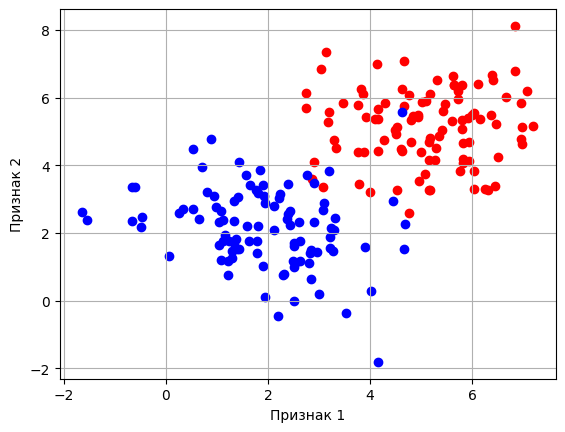

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)

n_samples = 100 

mean_class1 = [5, 5]
cov_class1 = [[1.5, 0.3], [0.3, 1.5]]  

mean_class2 = [2, 2]
cov_class2 = [[1.5, -0.2], [-0.2, 1.5]]

class1_data = np.random.multivariate_normal(mean_class1, cov_class1, n_samples)
class2_data = np.random.multivariate_normal(mean_class2, cov_class2, n_samples)

class1_labels = np.ones(n_samples)   
class2_labels = -np.ones(n_samples) 

x = np.vstack([class1_data, class2_data])
y = np.hstack([class1_labels, class2_labels])

plt.scatter(class1_data[:, 0], class1_data[:, 1], c='red')
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='blue');

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()


In [103]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_epoch=100):
        self._weights = np.array([0., 0., 0.])
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
    
    def activate(self, x):
        return 1 if x >= 0 else -1
    
    def fit(self, x, y):
        n_iter = x.shape[0]
        for epoch in range(self.n_epoch):
            idx = np.random.permutation(len(x))

            for i in idx:
                obj = np.insert(x[i], 0, 1)
                predict = self.activate(obj @ self._weights)
            
                if predict != y[i]:
                    self._weights += self.learning_rate * y[i] * obj
                    
    
    def predict(self, x):
        obj = np.insert(x, 0, 1)
        return self.activate(obj @ self._weights)
    
    @property
    def weights(self):
        return self._weights
    
    def func(self, x):
        return (-self._weights[0] - self._weights[1]*x) / self._weights[2]



model = Perceptron()
model.fit(x, y)

w = model.weights
w

array([-9.7       ,  1.47162438,  1.80391946])

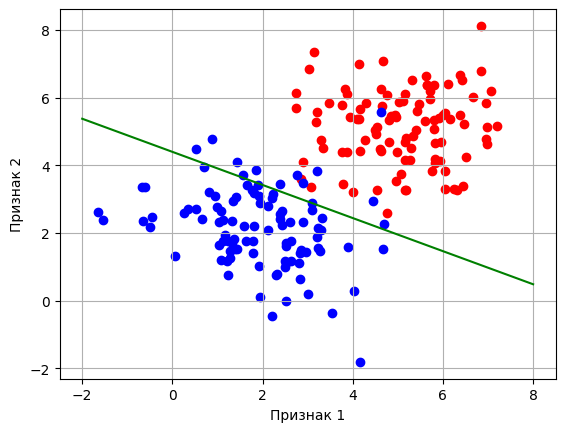

In [104]:


x_coord = np.array([-2, 8])
y_coord = np.array([model.func(0), model.func(6)])

plt.plot(x_coord, y_coord, color='green')

plt.scatter(class1_data[:, 0], class1_data[:, 1], c='red')
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='blue');

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()